What is the expected net earnings someone will receive from a job out of UCCS after getting a CS degree?

The random variable I am studying is salary following receiving a CS degree, one trial of the simulation is having a student receive their CS degree and try to get a job, and the outcome i am measuring is whether or not a former student receives employment and a salary after getting their CS degree.

Average salary across 100 simulations: $66,200.00


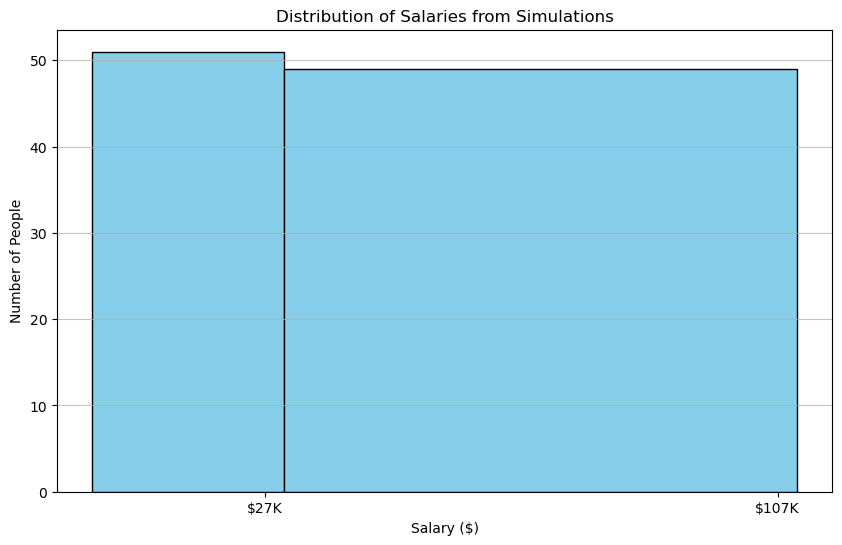

Number admitted to Colorado Springs: 99 (99.0%)
Number who graduated: 49 (49.0%)
Number who didn't graduate or weren't admitted: 51 (51.0%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_simulations = 100
admission_rate = 0.97
graduation_rate = 0.50
salary_if_graduate = 107000
salary_if_not_graduate = 27000

# Initialize array to store salaries
salaries = np.zeros(num_simulations)

# Run simulations
for i in range(num_simulations):
    # Check if admitted to Colorado Springs
    if np.random.random() < admission_rate:
        # Person was admitted, check if they graduate
        if np.random.random() < graduation_rate:
            # Person graduated
            salaries[i] = salary_if_graduate
        else:
            # Person didn't graduate
            salaries[i] = salary_if_not_graduate
    else:
        # Person wasn't admitted
        salaries[i] = salary_if_not_graduate

# Calculate average salary
average_salary = np.mean(salaries)
print(f"Average salary across {num_simulations} simulations: ${average_salary:,.2f}")

# Create a histogram of salaries
plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=[0, 30000, 110000], color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries from Simulations')
plt.xlabel('Salary ($)')
plt.ylabel('Number of People')
plt.xticks([27000, 107000], ['$27K', '$107K'])
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate some statistics
num_admitted = np.sum(salaries != salary_if_not_graduate) + np.sum((salaries == salary_if_not_graduate) & (np.random.random(num_simulations) < admission_rate))
num_graduated = np.sum(salaries == salary_if_graduate)
print(f"Number admitted to Colorado Springs: {num_admitted} ({num_admitted/num_simulations:.1%})")
print(f"Number who graduated: {num_graduated} ({num_graduated/num_simulations:.1%})")
print(f"Number who didn't graduate or weren't admitted: {num_simulations - num_graduated} ({(num_simulations - num_graduated)/num_simulations:.1%})")

theoretical expected value: $65,800 empirical expected value: $66,200.00